# Enzyme Kinetics: The Michaelis-Menten Model

## Introduction

Enzyme kinetics is the study of the rates of chemical reactions catalyzed by enzymes. The **Michaelis-Menten model** is a foundational framework in biochemistry that describes how the rate of an enzyme-catalyzed reaction depends on the concentration of the substrate.

## Theoretical Background

### The Enzyme-Substrate Reaction Mechanism

The simplest enzyme kinetics model assumes a single substrate $S$ binding to an enzyme $E$ to form an enzyme-substrate complex $ES$, which then converts to product $P$ and regenerates the free enzyme:

$$E + S \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} ES \stackrel{k_2}{\longrightarrow} E + P$$

where:
- $k_1$ is the rate constant for enzyme-substrate binding
- $k_{-1}$ is the rate constant for enzyme-substrate dissociation
- $k_2$ (also called $k_{\text{cat}}$) is the catalytic rate constant

### The Michaelis-Menten Equation

Under the **quasi-steady-state assumption** (QSSA), where $\frac{d[ES]}{dt} \approx 0$, the reaction velocity $v$ is given by:

$$v = \frac{V_{\max}[S]}{K_M + [S]}$$

where:
- $V_{\max} = k_2[E]_0$ is the maximum reaction velocity
- $K_M = \frac{k_{-1} + k_2}{k_1}$ is the **Michaelis constant**
- $[S]$ is the substrate concentration
- $[E]_0$ is the total enzyme concentration

### Physical Interpretation

The Michaelis constant $K_M$ has units of concentration and represents the substrate concentration at which the reaction velocity is half of $V_{\max}$:

$$v = \frac{V_{\max}}{2} \quad \text{when} \quad [S] = K_M$$

A **low $K_M$** indicates high enzyme affinity for the substrate (less substrate needed to reach half-maximal velocity), while a **high $K_M$** indicates low affinity.

### Limiting Cases

1. **Low substrate concentration** ($[S] \ll K_M$):
   $$v \approx \frac{V_{\max}}{K_M}[S]$$
   The reaction is approximately first-order with respect to substrate.

2. **High substrate concentration** ($[S] \gg K_M$):
   $$v \approx V_{\max}$$
   The reaction is zero-order (enzyme is saturated).

## Computational Implementation

We will now implement the Michaelis-Menten model and visualize:
1. The characteristic hyperbolic velocity curve
2. The Lineweaver-Burk (double-reciprocal) linearization
3. Parameter sensitivity analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Set random seed for reproducibility
np.random.seed(42)

# Define the Michaelis-Menten equation
def michaelis_menten(S, Vmax, Km):
    """
    Calculate reaction velocity using Michaelis-Menten kinetics.
    
    Parameters:
    -----------
    S : array-like
        Substrate concentration (mM)
    Vmax : float
        Maximum reaction velocity (mM/min)
    Km : float
        Michaelis constant (mM)
    
    Returns:
    --------
    v : array-like
        Reaction velocity (mM/min)
    """
    return (Vmax * S) / (Km + S)

# Define kinetic parameters
Vmax_true = 100.0  # mM/min (maximum velocity)
Km_true = 5.0      # mM (Michaelis constant)

# Generate substrate concentration range
S = np.linspace(0.1, 50, 200)  # mM

# Calculate theoretical velocity
v_theoretical = michaelis_menten(S, Vmax_true, Km_true)

# Generate synthetic experimental data with noise
S_exp = np.array([0.5, 1.0, 2.0, 3.0, 5.0, 7.5, 10.0, 15.0, 20.0, 30.0, 40.0])
v_exp_true = michaelis_menten(S_exp, Vmax_true, Km_true)
noise = np.random.normal(0, 3, len(S_exp))  # Add Gaussian noise
v_exp = v_exp_true + noise
v_exp = np.maximum(v_exp, 0.1)  # Ensure positive velocities

print("Synthetic Experimental Data:")
print(f"{'[S] (mM)':<12} {'v (mM/min)':<12}")
print("-" * 24)
for s, v in zip(S_exp, v_exp):
    print(f"{s:<12.1f} {v:<12.2f}")

Synthetic Experimental Data:
[S] (mM)     v (mM/min)  
------------------------
0.5          10.58       
1.0          16.25       
2.0          30.51       
3.0          42.07       
5.0          49.30       
7.5          59.30       
10.0         71.40       
15.0         77.30       
20.0         78.59       
30.0         87.34       
40.0         87.50       


## Parameter Estimation via Nonlinear Regression

We fit the Michaelis-Menten equation to the experimental data using nonlinear least squares regression.

In [2]:
# Fit the Michaelis-Menten model to experimental data
popt, pcov = curve_fit(michaelis_menten, S_exp, v_exp, p0=[80, 3], bounds=(0, [200, 50]))
Vmax_fit, Km_fit = popt
Vmax_err, Km_err = np.sqrt(np.diag(pcov))

print("\nParameter Estimation Results:")
print("=" * 40)
print(f"True Vmax:      {Vmax_true:.2f} mM/min")
print(f"Fitted Vmax:    {Vmax_fit:.2f} ± {Vmax_err:.2f} mM/min")
print(f"\nTrue Km:        {Km_true:.2f} mM")
print(f"Fitted Km:      {Km_fit:.2f} ± {Km_err:.2f} mM")

# Calculate fitted curve
v_fitted = michaelis_menten(S, Vmax_fit, Km_fit)


Parameter Estimation Results:
True Vmax:      100.00 mM/min
Fitted Vmax:    98.71 ± 1.99 mM/min

True Km:        5.00 mM
Fitted Km:      4.51 ± 0.31 mM


## Visualization

We create a comprehensive figure showing:
1. The Michaelis-Menten curve with experimental data
2. The Lineweaver-Burk plot for linearization
3. Sensitivity analysis of $K_M$ variation

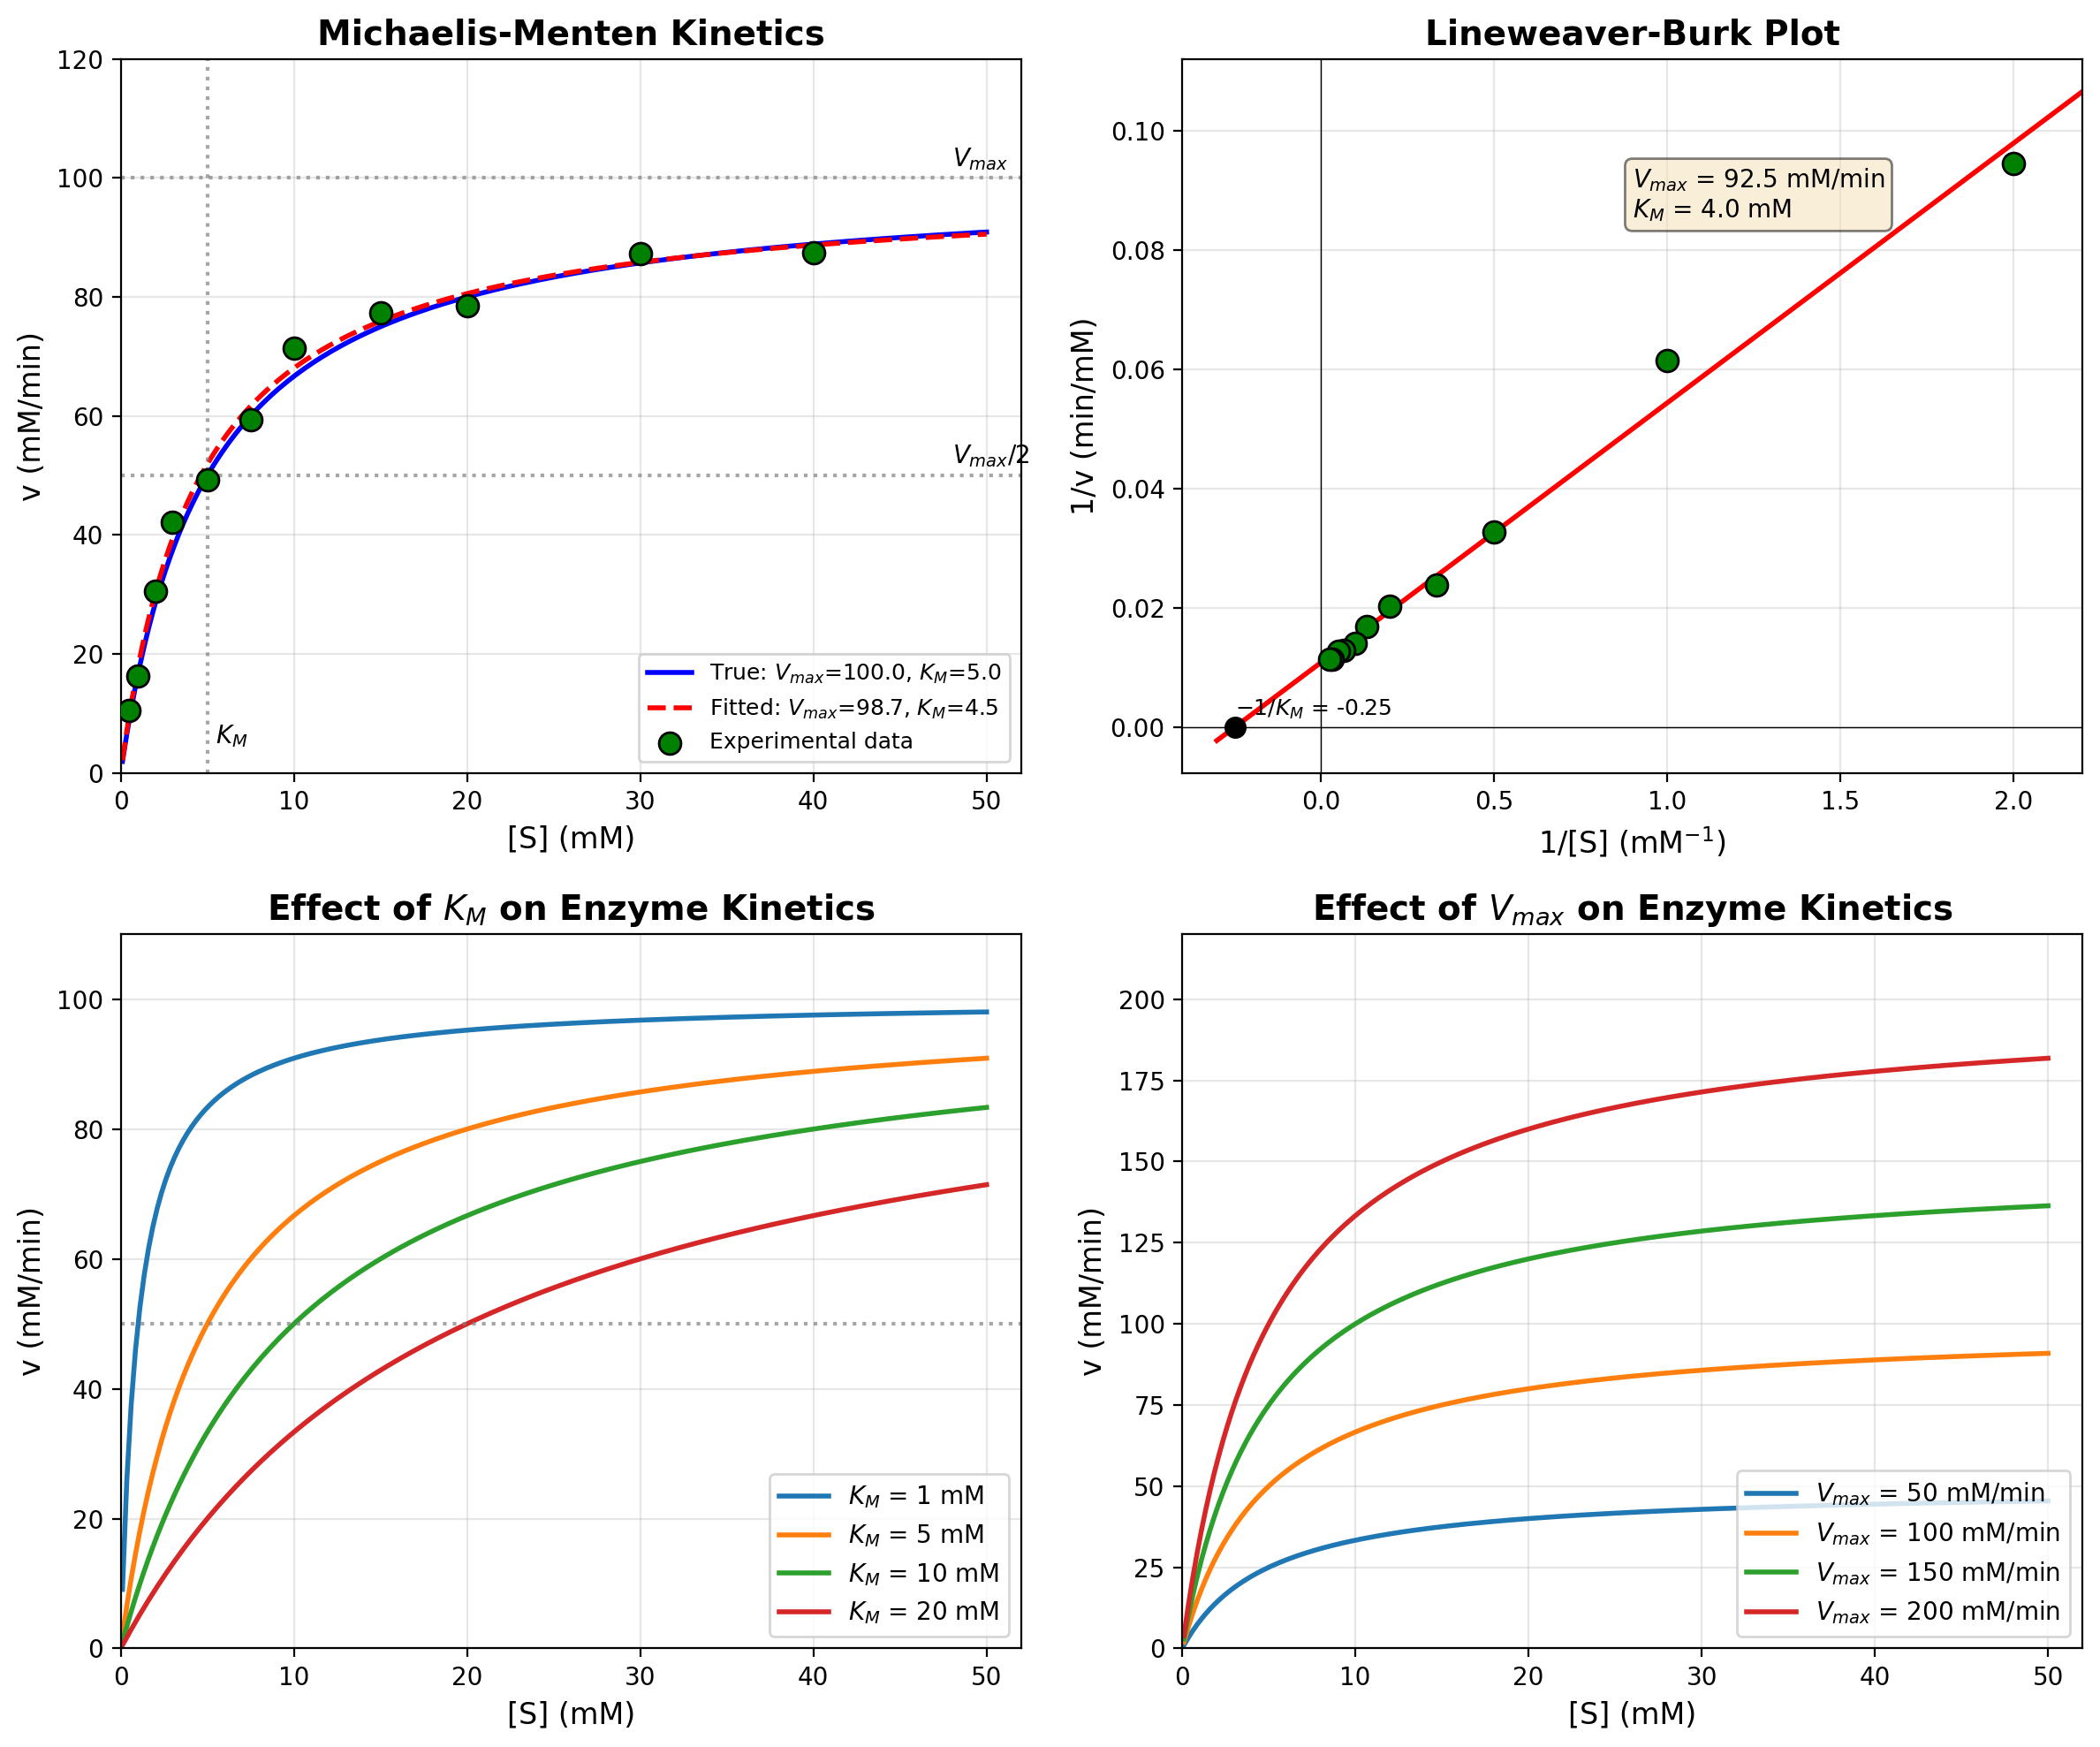


Figure saved as 'plot.png'


In [3]:
# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Michaelis-Menten curve
ax1 = axes[0, 0]
ax1.plot(S, v_theoretical, 'b-', linewidth=2, label=f'True: $V_{{max}}$={Vmax_true}, $K_M$={Km_true}')
ax1.plot(S, v_fitted, 'r--', linewidth=2, label=f'Fitted: $V_{{max}}$={Vmax_fit:.1f}, $K_M$={Km_fit:.1f}')
ax1.scatter(S_exp, v_exp, c='green', s=80, edgecolors='black', zorder=5, label='Experimental data')
ax1.axhline(y=Vmax_true, color='gray', linestyle=':', alpha=0.7)
ax1.axhline(y=Vmax_true/2, color='gray', linestyle=':', alpha=0.7)
ax1.axvline(x=Km_true, color='gray', linestyle=':', alpha=0.7)
ax1.annotate('$V_{max}$', xy=(48, Vmax_true+2), fontsize=10)
ax1.annotate('$V_{max}/2$', xy=(48, Vmax_true/2+2), fontsize=10)
ax1.annotate('$K_M$', xy=(Km_true+0.5, 5), fontsize=10)
ax1.set_xlabel('[S] (mM)', fontsize=12)
ax1.set_ylabel('v (mM/min)', fontsize=12)
ax1.set_title('Michaelis-Menten Kinetics', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.set_xlim(0, 52)
ax1.set_ylim(0, 120)
ax1.grid(True, alpha=0.3)

# Plot 2: Lineweaver-Burk plot (double-reciprocal)
ax2 = axes[0, 1]
S_lb = S_exp[S_exp > 0]
v_lb = v_exp[S_exp > 0]
inv_S = 1 / S_lb
inv_v = 1 / v_lb

# Linear regression for Lineweaver-Burk
coeffs = np.polyfit(inv_S, inv_v, 1)
slope, intercept = coeffs
Vmax_lb = 1 / intercept
Km_lb = slope * Vmax_lb

inv_S_line = np.linspace(-0.3, max(inv_S) + 0.2, 100)
inv_v_line = slope * inv_S_line + intercept

ax2.scatter(inv_S, inv_v, c='green', s=80, edgecolors='black', zorder=5)
ax2.plot(inv_S_line, inv_v_line, 'r-', linewidth=2)
ax2.axhline(y=0, color='black', linewidth=0.5)
ax2.axvline(x=0, color='black', linewidth=0.5)
ax2.plot(-1/Km_lb, 0, 'ko', markersize=8)
ax2.annotate(f'$-1/K_M$ = {-1/Km_lb:.2f}', xy=(-1/Km_lb, 0.002), fontsize=9)
ax2.set_xlabel('1/[S] (mM$^{-1}$)', fontsize=12)
ax2.set_ylabel('1/v (min/mM)', fontsize=12)
ax2.set_title('Lineweaver-Burk Plot', fontsize=14, fontweight='bold')
ax2.text(0.5, 0.85, f'$V_{{max}}$ = {Vmax_lb:.1f} mM/min\n$K_M$ = {Km_lb:.1f} mM', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax2.set_xlim(-0.4, 2.2)
ax2.grid(True, alpha=0.3)

# Plot 3: Effect of varying Km
ax3 = axes[1, 0]
Km_values = [1, 5, 10, 20]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for Km_var, color in zip(Km_values, colors):
    v_var = michaelis_menten(S, Vmax_true, Km_var)
    ax3.plot(S, v_var, color=color, linewidth=2, label=f'$K_M$ = {Km_var} mM')

ax3.axhline(y=Vmax_true/2, color='gray', linestyle=':', alpha=0.7)
ax3.set_xlabel('[S] (mM)', fontsize=12)
ax3.set_ylabel('v (mM/min)', fontsize=12)
ax3.set_title('Effect of $K_M$ on Enzyme Kinetics', fontsize=14, fontweight='bold')
ax3.legend(loc='lower right', fontsize=10)
ax3.set_xlim(0, 52)
ax3.set_ylim(0, 110)
ax3.grid(True, alpha=0.3)

# Plot 4: Effect of varying Vmax
ax4 = axes[1, 1]
Vmax_values = [50, 100, 150, 200]
for Vmax_var, color in zip(Vmax_values, colors):
    v_var = michaelis_menten(S, Vmax_var, Km_true)
    ax4.plot(S, v_var, color=color, linewidth=2, label=f'$V_{{max}}$ = {Vmax_var} mM/min')

ax4.set_xlabel('[S] (mM)', fontsize=12)
ax4.set_ylabel('v (mM/min)', fontsize=12)
ax4.set_title('Effect of $V_{max}$ on Enzyme Kinetics', fontsize=14, fontweight='bold')
ax4.legend(loc='lower right', fontsize=10)
ax4.set_xlim(0, 52)
ax4.set_ylim(0, 220)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('enzyme_kinetics_michaelis_menten_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'plot.png'")

## Summary

This notebook demonstrated the **Michaelis-Menten model** of enzyme kinetics:

1. **Theory**: The hyperbolic relationship between substrate concentration and reaction velocity arises from enzyme-substrate complex formation under quasi-steady-state conditions.

2. **Key Parameters**:
   - $V_{\max}$: Maximum velocity when enzyme is saturated
   - $K_M$: Substrate concentration at half-maximal velocity (inversely related to enzyme-substrate affinity)

3. **Parameter Estimation**: Nonlinear regression provides more accurate estimates than linearization methods like the Lineweaver-Burk plot.

4. **Sensitivity**: Lower $K_M$ values indicate higher substrate affinity (velocity approaches $V_{\max}$ at lower substrate concentrations).

The Michaelis-Menten equation remains a cornerstone of biochemistry, providing insights into enzyme function, drug design, and metabolic engineering.